11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


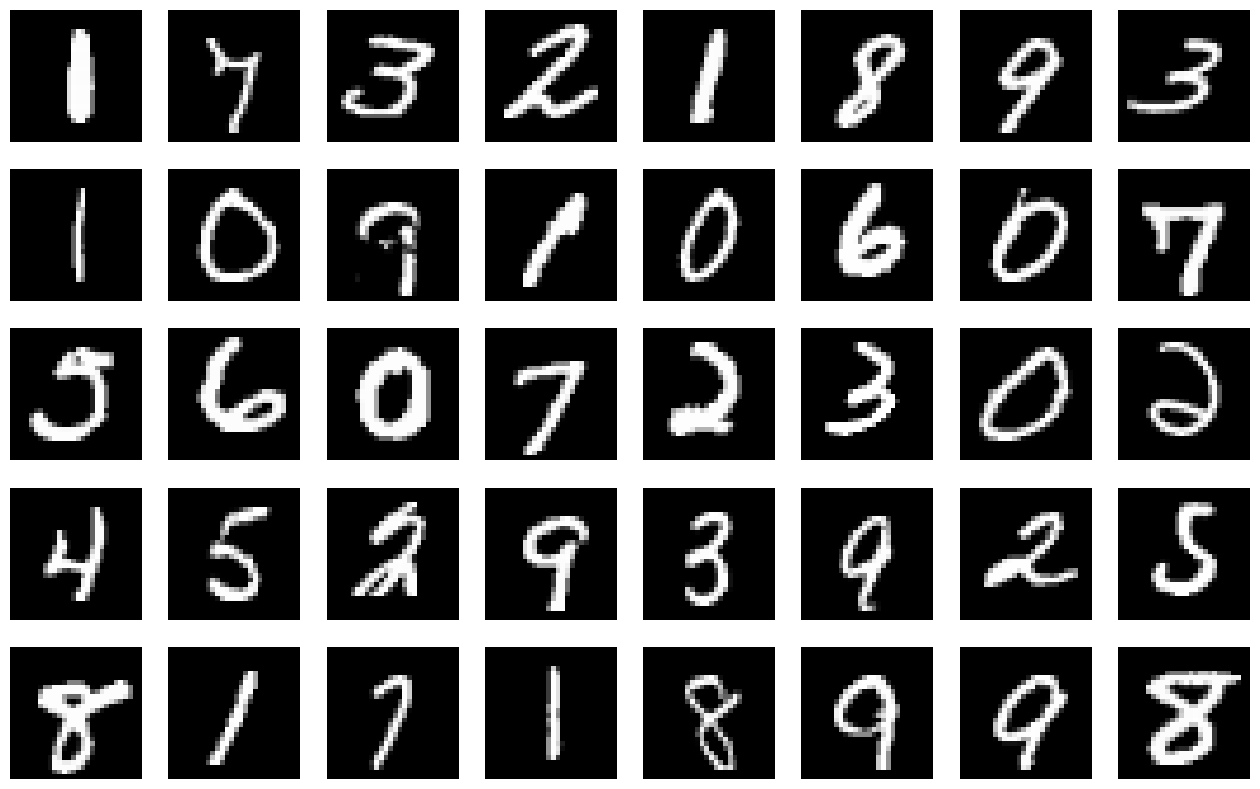

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
from random import randrange
plt.figure(figsize=(16,10),facecolor='white')
for i in range(5):
  for j in range(8):
    index=randrange(60000)
    plt.subplot(5,8,i*8+j+1)
    plt.axis('off')
    plt.imshow(x_train[index],cmap='gray')
plt.show()

In [2]:
import tensorflow as tf
print('轉換為CNN所需的規格，多加上一維')
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)
print('將圖像特徵縮放在0到1之間')
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print(x_train)
category=10 #分類的結果是10個
y_train2=tf.keras.utils.to_categorical(y_train,category)
y_test2=tf.keras.utils.to_categorical(y_test,category)
print(y_train.shape)
print(y_test.shape)
print(y_train2.shape)
print(y_test2.shape)

轉換為CNN所需的規格，多加上一維
(60000, 28, 28, 1)
(10000, 28, 28, 1)
將圖像特徵縮放在0到1之間
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   

In [3]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,994 (867.16 KB)

 Trainable params: 221,994 (867.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.8335 - loss: 0.5600 - val_accuracy: 0.9807 - val_loss: 0.0609
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.9802 - loss: 0.0663 - val_accuracy: 0.9871 - val_loss: 0.0416
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.9870 - loss: 0.0436 - val_accuracy: 0.9870 - val_loss: 0.0387
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9904 - loss: 0.0321 - val_accuracy: 0.9900 - val_loss: 0.0323
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9925 - loss: 0.0241 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9898 - val_loss: 0.0315
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.9948 - loss: 0.0174 - val_accuracy: 0.9907 - val_loss: 0.0297
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - accuracy: 0.9959 - loss: 0.0134 - 

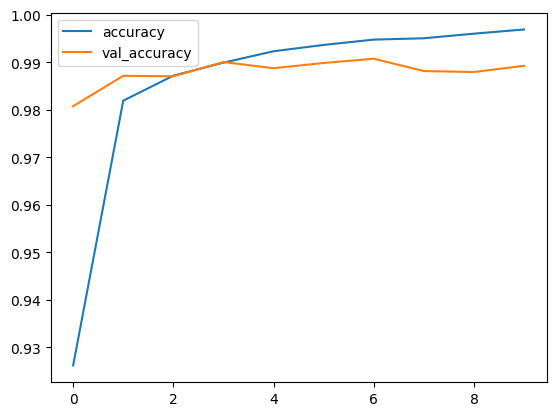

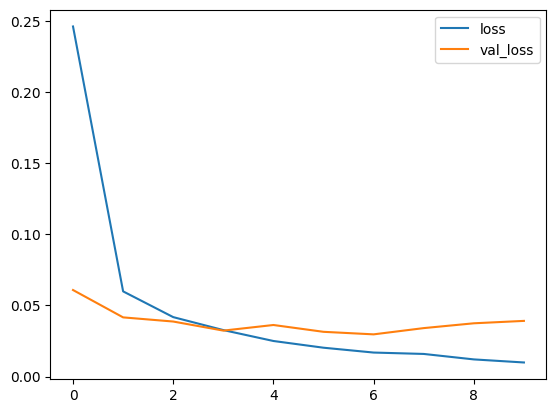

In [4]:
history=model.fit(x_train,y_train2,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test2),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [5]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=40,kernel_size=(2,2),padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=40,kernel_size=(2,2),padding='same',activation='relu'))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 40)     │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 40)     │         6,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       784,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 817,230 (3.12 MB)

 Trainable params: 817,230 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 126ms/step - accuracy: 0.8492 - loss: 0.5143 - val_accuracy: 0.9836 - val_loss: 0.0501
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.9841 - loss: 0.0526 - val_accuracy: 0.9877 - val_loss: 0.0392
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9893 - val_loss: 0.0320
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9889 - val_loss: 0.0333
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.9948 - loss: 0.0167 - val_accuracy: 0.9886 - val_loss: 0.0354
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9898 - val_loss: 0.0398
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.9900 - val_loss: 0.0356
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 134ms/step - accuracy: 0.9960 - loss: 0

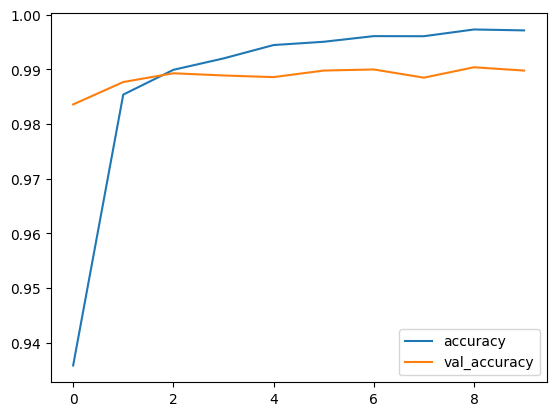

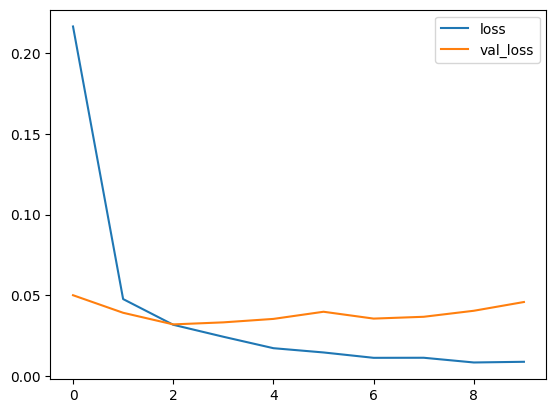

In [6]:
history=model.fit(x_train,y_train2,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test2),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [7]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,994 (867.16 KB)

 Trainable params: 221,994 (867.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.7579 - loss: 0.7303 - val_accuracy: 0.9779 - val_loss: 0.0741
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.9676 - loss: 0.1088 - val_accuracy: 0.9853 - val_loss: 0.0446
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.9773 - loss: 0.0762 - val_accuracy: 0.9891 - val_loss: 0.0356
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9837 - loss: 0.0548 - val_accuracy: 0.9901 - val_loss: 0.0326
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 81ms/step - accuracy: 0.9874 - loss: 0.0434 - val_accuracy: 0.9889 - val_loss: 0.0321
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.9883 - loss: 0.0382 - val_accuracy: 0.9893 - val_loss: 0.0314
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9905 - loss: 0.0310 - val_accuracy: 0.9898 - val_loss: 0.0320
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9925 - loss: 0.0258 - 

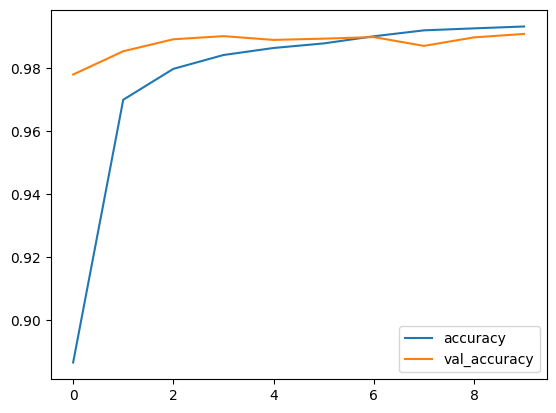

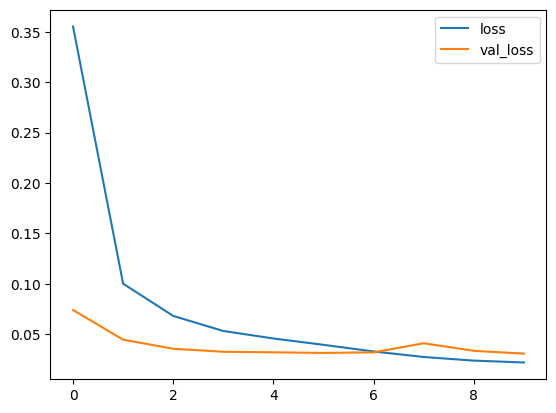

In [8]:
history=model.fit(x_train,y_train2,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test2),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [9]:
print('針對測試資料進行驗證')
score=model.evaluate(x_test,y_test2,verbose=1)
print('測試資料的 loss:',score[0])
print('測試資料的 accuracy:',score[1])
print('模型儲存')
model.save('minist_model.h5')

針對測試資料進行驗證
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9888 - loss: 0.0366


測試資料的 loss: 0.030794458463788033
測試資料的 accuracy: 0.9908000230789185
模型儲存
